### Problem Statement:

You are a data scientist / AI engineer working on a multiclass classification problem. You have been provided with a dataset named **`"dry_bean_dataset.xlsx"`**, which includes various features of dry beans to predict their class. The dataset comprises the following columns:

- `area:` The area of a bean zone and the number of pixels within its boundaries.
- `perimeter:` Bean circumference is defined as the length of its border.
- `majorAxisLength:` The distance between the ends of the longest line that can be drawn from a bean.
- `minorAxisLength:` The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- `aspectRatio:` Defines the relationship between the major and minor axis lengths.
- `eccentricity:` Eccentricity of the ellipse having the same moments as the region.
- `convexArea:` Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- `equivDiameter:` The diameter of a circle having the same area as a bean seed area.
- `extent:` The ratio of the pixels in the bounding box to the bean area.
- `solidity:` Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
- `roundness:` Calculated with the formula: (4 * π * Area) / (Perimeter^2).
- `compactness:` Measures the roundness of an object: EquivalentDiameter / MajorAxisLength.
- `shapeFactor1:` The ratio of Area to the square of Perimeter.
- `shapeFactor2:` The ratio of Area to the square of MajorAxisLength.
- `shapeFactor3:` The ratio of Area to the product of MajorAxisLength and MinorAxisLength.
- `shapeFactor4:` The ratio of Perimeter to the product of MajorAxisLength and MinorAxisLength.
- `class:` The class of the bean (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).

Your task is to use this dataset to build and evaluate a Logistic Regression model to classify the beans into their respective classes.

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507 
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)

**Import Necessary Libraries**

In [2]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model,model_selection,preprocessing,metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"dry_bean_dataset.xlsx"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Check the distribution of classes in the target variable.
6. Visualize the distribution of features `(area, perimeter, major_axis_length, minor_axis_length)` using scatter plots.

In [3]:
!pip install openpyxl


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Step 1: Import the data
df = pd.read_excel("dry_bean_dataset.xlsx")

# Step 2: Display the number of rows and columns
print("Row: ",df.shape[0],"\nCol: ",df.shape[1])


# Step 3: Display the first few rows of the dataset
df.head()

Row:  13611 
Col:  17


,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Step 4: Check for any missing values
df.isnull().values.any()

False

In [6]:
# Step 5: Check the distribution of classes in the target variable
df['class'].value_counts()

class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

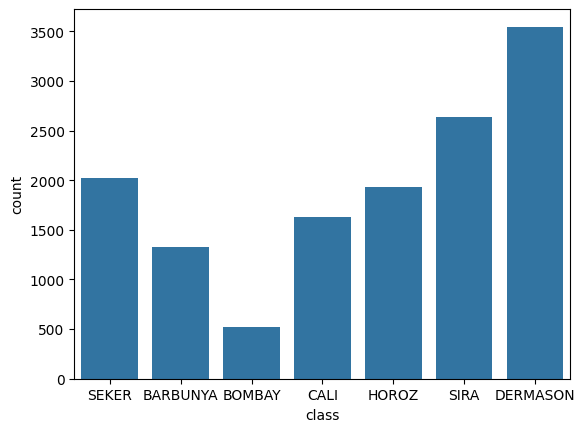

In [7]:
sns.countplot(x='class',data=df)
plt.show()

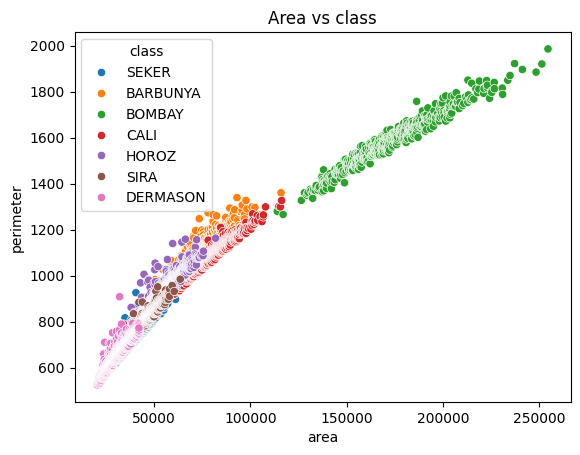

In [8]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
sns.scatterplot(data=df,x='area',y='perimeter',hue='class')
plt.title("Area vs class")
plt.show()

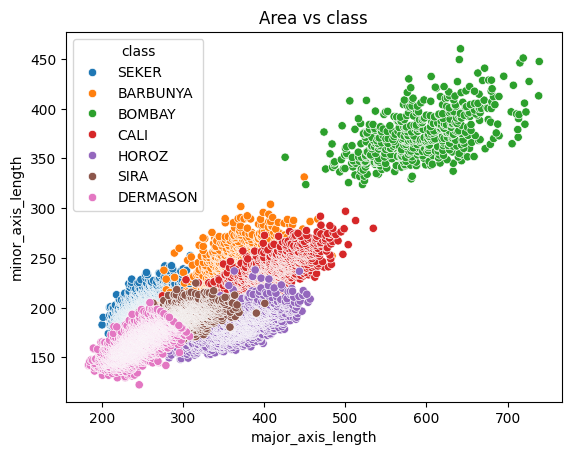

In [ ]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
sns.scatterplot(data=df,x='major_axis_length',y='minor_axis_length',hue='class')
plt.title("Minor Vs Major Axis Length")
plt.show()

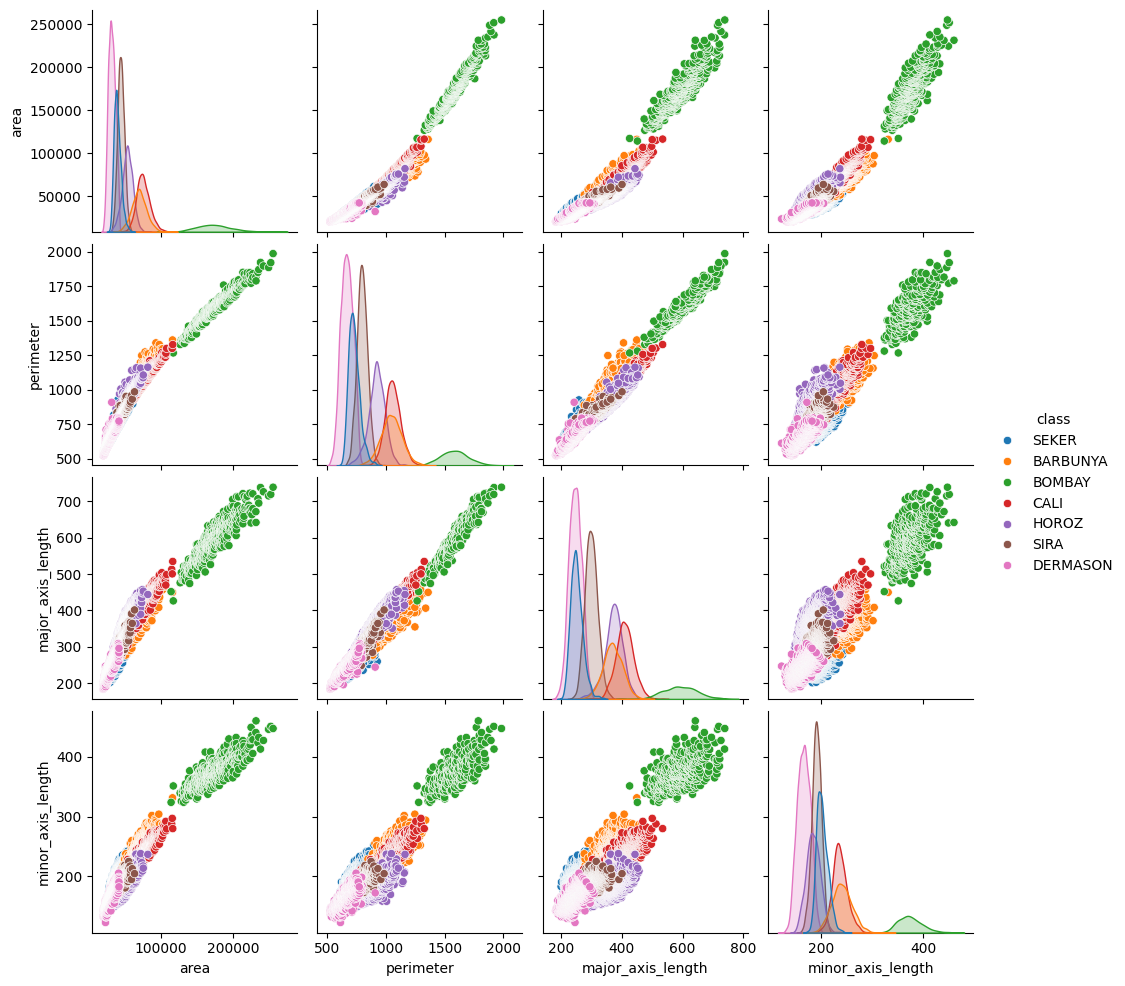

In [10]:
sns.pairplot(df, vars=["area", "perimeter", "major_axis_length", "minor_axis_length"], hue="class")
plt.show()

### Task 2: Data Preprocessing

1. Select the features (all columns except 'class') and the target variable for modeling.
   
2. Split the data into training and testing sets with a test size of 30%.

In [11]:
# Step 1: Select features and target variable
features = df.drop('class',axis=1)
target = df['class']

# Step 2: Split the data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(
    features,target,
    test_size=0.2,
    random_state=42,
    stratify=target
)


### Task 3: Model Training and Evaluation Using Logistic Regression

1. Initialize and train a Logistic Regression model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Plot the confusion matrix for the Logistic Regression model.

In [12]:
# Step 1: Initialize and train a Logistic Regression model
model = linear_model.LogisticRegression()
# model = linear_model.LogisticRegression(max_iter=1000,solver='lbfgs')
# model.fit(X_train,Y_train)

In [13]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# model.fit(X_train_scaled,Y_train)
model.fit(X_train,Y_train)

c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Step 2: Make predictions on the test set
# Y_pred =model.predict(X_test_scaled)
Y_pred =model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
print("Accuracy :",metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred))

Accuracy : 0.6988615497612927
              precision    recall  f1-score   support

    BARBUNYA       0.67      0.52      0.59       265
      BOMBAY       1.00      0.99      1.00       104
        CALI       0.73      0.78      0.75       326
    DERMASON       0.81      0.87      0.84       709
       HOROZ       0.60      0.55      0.58       386
       SEKER       0.67      0.62      0.65       406
        SIRA       0.56      0.61      0.59       527

    accuracy                           0.70      2723
   macro avg       0.72      0.71      0.71      2723
weighted avg       0.70      0.70      0.70      2723



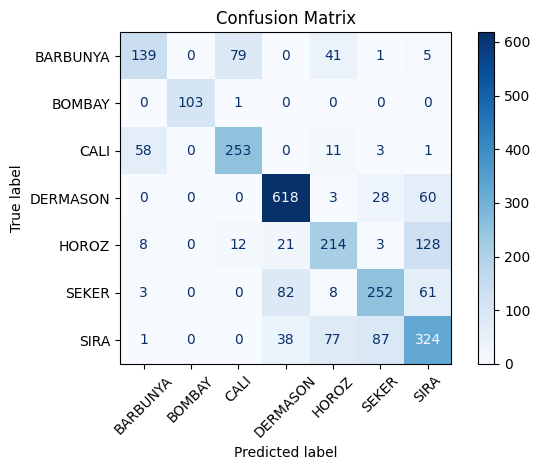

[[139   0  79   0  41   1   5]
 [  0 103   1   0   0   0   0]
 [ 58   0 253   0  11   3   1]
 [  0   0   0 618   3  28  60]
 [  8   0  12  21 214   3 128]
 [  3   0   0  82   8 252  61]
 [  1   0   0  38  77  87 324]] ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [15]:
# Step 4: Plot the confusion matrix
cm=metrics.confusion_matrix(Y_test,Y_pred)
labels = model.classes_
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap='Blues',xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
print(cm,labels)

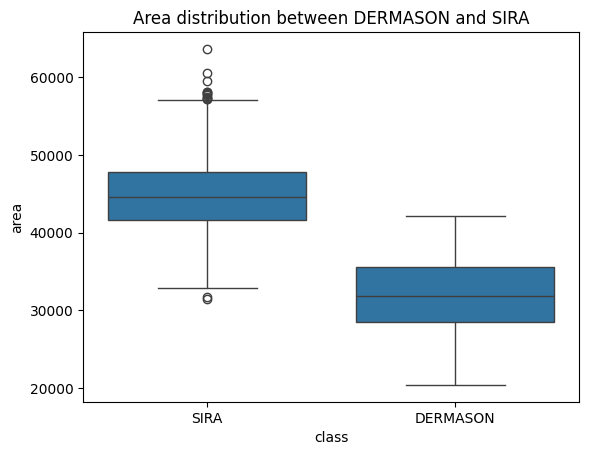

In [16]:
sns.boxplot(x='class', y='area', data=df[df['class'].isin(['DERMASON', 'SIRA'])])
plt.title('Area distribution between DERMASON and SIRA')
plt.show()

### Task 4: Train Logistic Regression with Specific Parameters

1. Train a Logistic Regression model with specified parameters:
    - Max iterations: 300
    - Regularization strength (C): 0.5
    - 'tol': 0.001
    - class_weight: 'balanced'
<br></br>

Learn about these parameters here: [scikit-learn LogisticRegression Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------



2. Make predictions on the test set using the trained model.
   
3. Evaluate the model using a classification report and print the report.
   
4. Plot the confusion matrix for this Logistic Regression model.


In [17]:
# Step 1: Train a Logistic Regression model with specified parameters
model2 = linear_model.LogisticRegression(max_iter=300,class_weight='balanced',tol=0.001,C=0.5)

# Step 2: Make predictions on the test set
model2.fit(X_train_scaled,Y_train)
Y_pred2=model2.predict(X_test_scaled)

In [18]:
# Step 3: Evaluate the model using a classification report
print("Accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print(metrics.classification_report(Y_test,Y_pred2))

Accuracy : 0.9162688211531399
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.94      0.88      0.91       709
       HOROZ       0.96      0.95      0.95       386
       SEKER       0.92      0.95      0.94       406
        SIRA       0.83      0.89      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



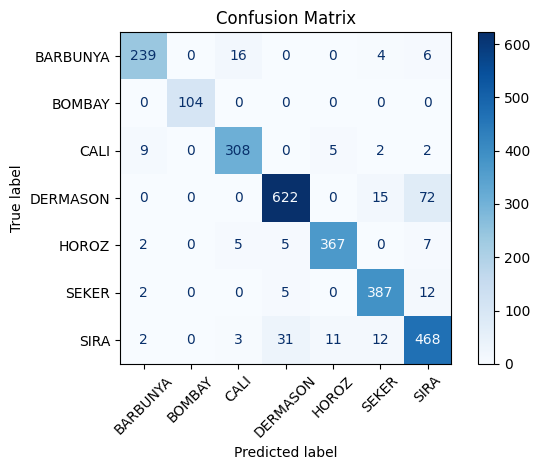

[[139   0  79   0  41   1   5]
 [  0 103   1   0   0   0   0]
 [ 58   0 253   0  11   3   1]
 [  0   0   0 618   3  28  60]
 [  8   0  12  21 214   3 128]
 [  3   0   0  82   8 252  61]
 [  1   0   0  38  77  87 324]] ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [19]:
# Step 4: Plot the confusion matrix
cm2=metrics.confusion_matrix(Y_test,Y_pred2)
labels =model2.classes_
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels)
disp2.plot(cmap='Blues',xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
print(cm,labels)

In [20]:
model3 = linear_model.LogisticRegression(max_iter=1000,solver='lbfgs')

In [21]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model3.fit(X_train_scaled,Y_train)
Y_pred3 =model3.predict(X_test_scaled)

In [22]:
print("Accuracy :",metrics.accuracy_score(Y_test,Y_pred3))
print(metrics.classification_report(Y_test,Y_pred3))

Accuracy : 0.9214102093279471
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



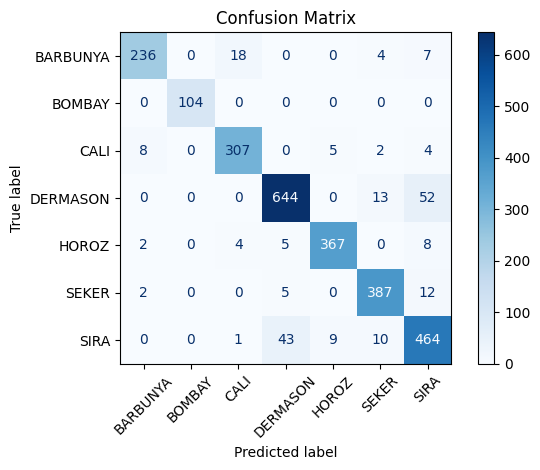

In [23]:
cm=metrics.confusion_matrix(Y_test,Y_pred3)
labels = model.classes_
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap='Blues',xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()